# Chapter 5: Multiple Regression Analysis: OLS Asymptotics

## 5.1: Consistency
- Consistency concerns how far the estimator is likely to be from the parameter it is supposed to be estimating as we let the sample size increase indefinitely.
- Let $W_n$ be an estimator of $\theta$ based on a sample $Y_1, Y_2, \dots, Y_n$ of size $n$. Then, $W_n$ is a **consistent estimator** of $\theta$ if for every $\varepsilon > 0$,

$$P(|W_n - \theta| > \varepsilon) \rightarrow 0 \text{ as } n \rightarrow \infty.$$
- This basically means that, as sample sizes start approaching infinity, porbability that the estimate is very different from the parameter being estimated approaches zero. Or, in simpler terms, as the sample size increases, the value of the estimate starts approaching the true parameter value. 

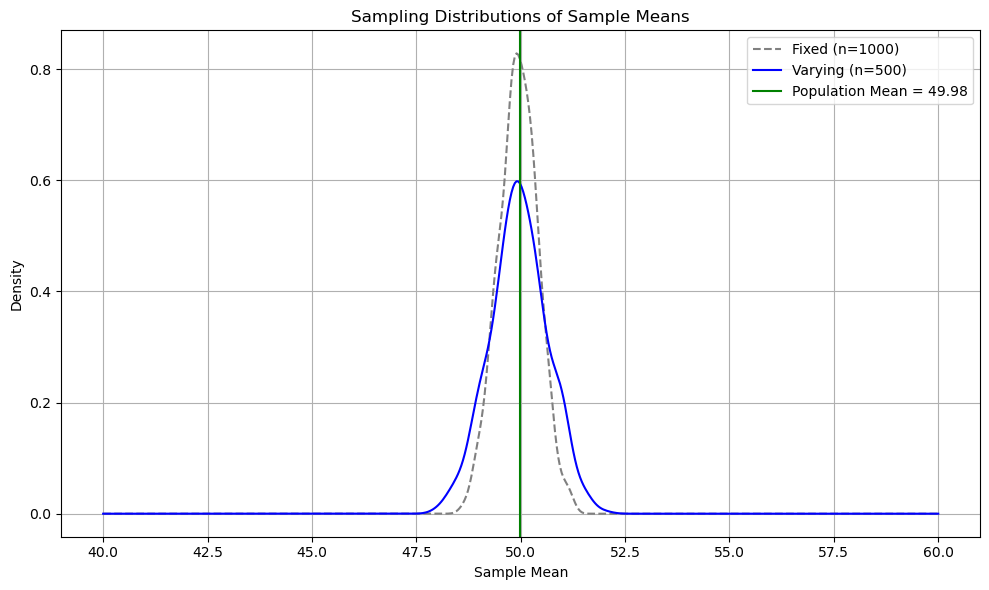

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1. Generate the population
np.random.seed(42)
population = np.random.normal(loc=50, scale=15, size=1_000_000)
pop_mean = np.mean(population)

# 2. Function to generate sample means
def get_sample_means(sample_size, n_samples=500):
    return np.array([
        np.mean(np.random.choice(population, size=sample_size, replace=False))
        for _ in range(n_samples)
    ])

# 3. Fixed sampling distribution (sample size = 10,000)
fixed_sample_size = 1000
fixed_sample_means = get_sample_means(fixed_sample_size)
kde_fixed = gaussian_kde(fixed_sample_means)

# 4. Varying sampling distribution — change this value to see the effect
varying_sample_size = 500  # <-- Change this number and re-run the code
varying_sample_means = get_sample_means(varying_sample_size)
kde_varying = gaussian_kde(varying_sample_means)

# 5. Define x-axis range
x_vals = np.linspace(40, 60, 500)

# 6. Plot
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde_fixed(x_vals), label=f'Fixed (n={fixed_sample_size})', linestyle='--', color='gray')
plt.plot(x_vals, kde_varying(x_vals), label=f'Varying (n={varying_sample_size})', color='blue')
plt.axvline(pop_mean, color='green', linestyle='-', label=f'Population Mean = {pop_mean:.2f}')

plt.title('Sampling Distributions of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

